# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [73]:
#arquivo = 'data/23.31S-42.82W-TAVG-Trend.txt' #definiu-se o arquivo a ser aberto e seu local de destino
def temp_mensal(arquivo): #definiu-se a funçao que ler temperatura mensal
    arquivo = open(arquivo) #abriu o arquivo com os dados
    datas = [] #definiu uma lista vazia para as datas
    dados = [] #definiu uma lista vazia para os dados
    for linhas in arquivo: #funçao para ler as linhas do arquivo
        if linhas[0] != '%': #funçao para nao ler as linhas que contem %
            coluna = linhas.split() #funçao para separar as colunas, que sao separadas por espaços
            if len(coluna) != 0: #funçao para nao ler linhas vazias
                if coluna[2] != 'NaN': #funçao para nao ler linhas que nao contem numeros
                    ano = float(coluna[0]) #transformar em numero e ler a coluna com os anos
                    mes = float(coluna[1]) #transformar em numero e ler a coluna com os meses
                    anomalia = float(coluna[2]) #transformar em numero e definir as anomalias
                    temp = 24.01 + anomalia #converter as anomalias para temperaturas
                    ano_mes = ano + (mes/12) #representar os meses em fraçoes de anos
                    datas.append(ano_mes) #adicionar as datas na lista vazia
                    dados.append(temp) #adicionar os dados de temperatura na lista vazia
    return datas, dados  #retornar as listas criadas 
    arquivo.close() #fechamos o arquivo

In [72]:
#arquivo = 'data/23.31S-42.82W-TAVG-Trend.txt' #definiu-se o arquivo a ser aberto e seu local de destino
def temp_movel_anual(arquivo): #definiu-se a funçao que ler temperatura media anual
    arquivo = open(arquivo) #abriu o arquivo com os dados
    datas_anual = [] #definiu uma lista vazia para as datas
    dados_anual = [] #definiu uma lista vazia para os dados
    for linhas in arquivo: #funçao para ler as linhas do arquivo
        if linhas[0] != '%': #funçao para nao ler as linhas que contem %
            coluna = linhas.split() #funçao para separar as colunas, que sao separadas por espaços
            if len(coluna) != 0: #funçao para nao ler linhas vazias
                if coluna[4] != 'NaN': #funçao para nao ler linhas que nao contem numeros
                    ano = float(coluna[0]) #transformar em numero e ler a coluna com os anos
                    mes = float(coluna[1]) #transformar em numero e ler a coluna com os meses
                    anomalia = float(coluna[4]) #transformar em numero e definir as anomalias
                    temp = 24.01 + anomalia #converter as anomalias para temperaturas
                    ano_mes = ano + (mes/12) #representar os meses em fraçoes de anos
                    datas_anual.append(ano_mes) #adicionar as datas na lista vazia
                    dados_anual.append(temp) #adicionar os dados de temperatura na lista vazia
    return datas_anual, dados_anual  #retornar as listas criadas 
    arquivo.close() #fechamos o arquivo

In [74]:
[datas, dados] = temp_mensal('data/23.31S-42.82W-TAVG-Trend.txt') #chamar a funçao 
[datas_anual, dados_anual] = temp_movel_anual('data/23.31S-42.82W-TAVG-Trend.txt') #chamar a funçao

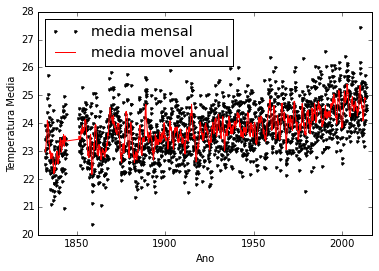

In [84]:
plt.figure() #criamos aqui a figura em branco
plt.plot(datas, dados, '.k', label = 'media mensal') #aqui preenchemo-nas com os dados organizados
plt.plot(datas_anual, dados_anual, '-r', label = 'media movel anual') #aqui preenchemo-nas com os dados organizados
plt.xlabel("Ano") #nomeamos o eixo X
plt.xlim(1828, 2017) #definir os limites do eixo x
plt.ylabel("Temperatura Media") #nomeamos o eixo Y
plt.legend(loc='upper left', fontsize='x-large') #definir a posiçao e tamanho da legenda


### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).